# Tax consultancy segmentation
**State wise analysis of GST revenue**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df1 = pd.read_csv("India GST revenue.csv")
df2 = pd.read_csv("Active_companies_India.csv")
df3 = pd.read_csv("Indian public finance stats.csv",index_col=0)

In [4]:
df1

,States,2020,2021,Growth
0,Jammu and Kashmir,368,377,0.03
1,Himachal Pradesh,653,680,0.04
2,Punjab,1194,1402,0.17
3,Chandigarh,141,152,0.08
4,Uttarakhand,1065,1131,0.06
5,Haryana,4712,5577,0.18
6,Delhi,3146,3605,0.15
7,Rajasthan,2647,2959,0.12
8,Uttar Pradesh,5075,5692,0.12
9,Bihar,996,876,-0.12


In [5]:
df1.columns

Index([' States', '2020', '2021', 'Growth'], dtype='object')

In [6]:
print("<----Total GST revenue in the year 2020---->")
df1['2020'].median()

<----Total GST revenue in the year 2020---->


912.0

In [7]:
print("<----Total GST revenue in the year 2021")
df1['2021'].median()

<----Total GST revenue in the year 2021


876.0

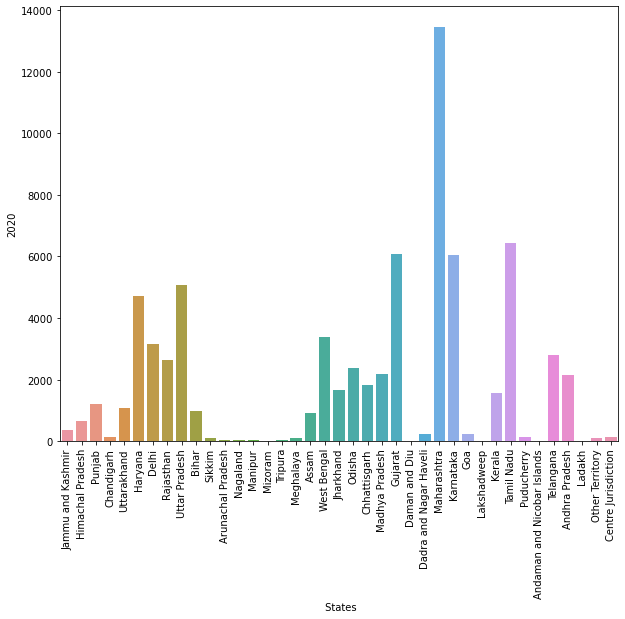

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(df1[' States'],df1['2020'])
plt.xticks(rotation=90)
plt.show()

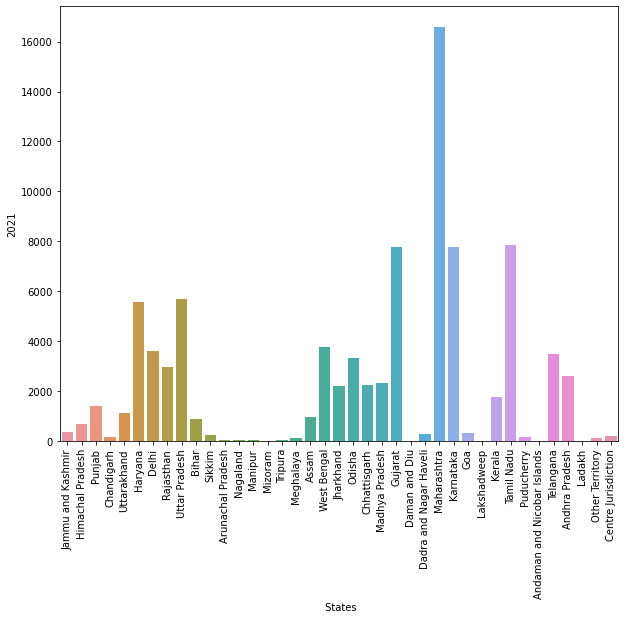

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(df1[' States'],df1['2021'])
plt.xticks(rotation=90)
plt.show()

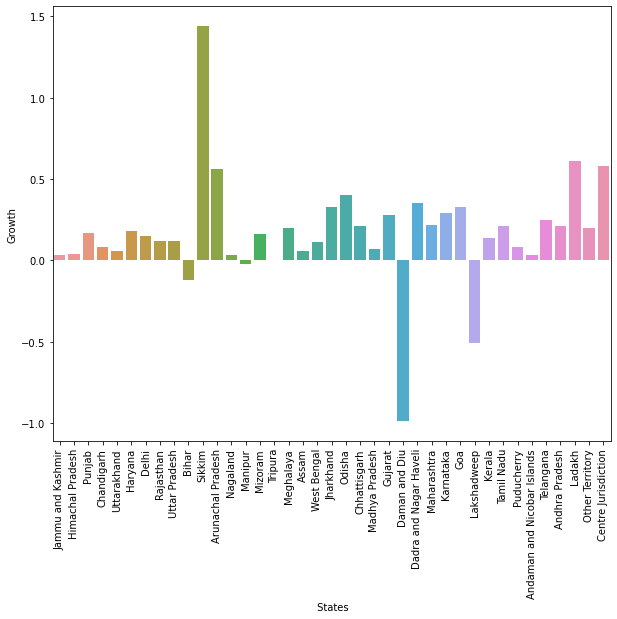

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(df1[' States'],df1['Growth'])
plt.xticks(rotation=90)
plt.show()

# Demographic analysis of Company firm registration

In [11]:
df2.columns

Index(['Company_name', 'Status', 'Class', 'Category', 'Sub_category', 'State',
       'Authorized_cap', 'Paidup_cap', 'Principal_service'],
      dtype='object')

In [12]:
df2.shape

(1190100, 9)

In [13]:
df2.head()

,Company_name,Status,Class,Category,Sub_category,State,Authorized_cap,Paidup_cap,Principal_service
0,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Private,Company limited by Shares,Non-govt company,Gujarat,0.0,0.0,Agriculture & allied
1,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,Gujarat,0.0,0.0,Agriculture & allied
2,TATE AND LYLE INDUSTRIES LTD,ACTV,Private,Company limited by Shares,Non-govt company,Gujarat,0.0,0.0,Agriculture & allied
3,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Private,Company limited by Shares,Non-govt company,Gujarat,0.0,0.0,Agriculture & allied
4,BALLAST NADAM INTERNATIONAL B V,ACTV,Private,Company limited by Shares,Non-govt company,Gujarat,0.0,0.0,Agriculture & allied


In [14]:
df2.tail()

,Company_name,Status,Class,Category,Sub_category,State,Authorized_cap,Paidup_cap,Principal_service
1190095,OKUSA AUTOMOBILES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,Nagaland,25000000.0,22500000.0,Wholesale and retail trade repair of motor veh...
1190096,YEPTHOMI MOTORS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,Nagaland,30000000.0,21000000.0,Wholesale and retail trade repair of motor veh...
1190097,VERTEX AUTOMOTIVE PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,Nagaland,5000000.0,10000.0,Wholesale and retail trade repair of motor veh...
1190098,NASHA TOYS PVT LTD,ACTV,Private,Company limited by Shares,Non-govt company,Nagaland,5000000.0,60000.0,Wholesale and retail trade repair of motor veh...
1190099,NAGA MART PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,Nagaland,500000.0,100000.0,Real estate renting and business activities


In [15]:
df2.isnull().sum()

Company_name         0
Status               0
Class                0
Category             0
Sub_category         0
State                0
Authorized_cap       0
Paidup_cap           0
Principal_service    0
dtype: int64

In [16]:
df2['Class'].value_counts()

Private                        1097006
Public                           65805
Private(One Person Company)      27289
Name: Class, dtype: int64

In [17]:
df2['Class'] = df2['Class'].replace({'Private(One Person Company)':'Private'})

<AxesSubplot:xlabel='Class', ylabel='count'>

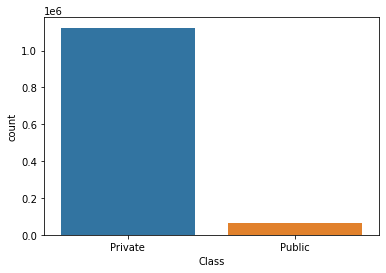

In [18]:
sns.countplot(df2['Class'])

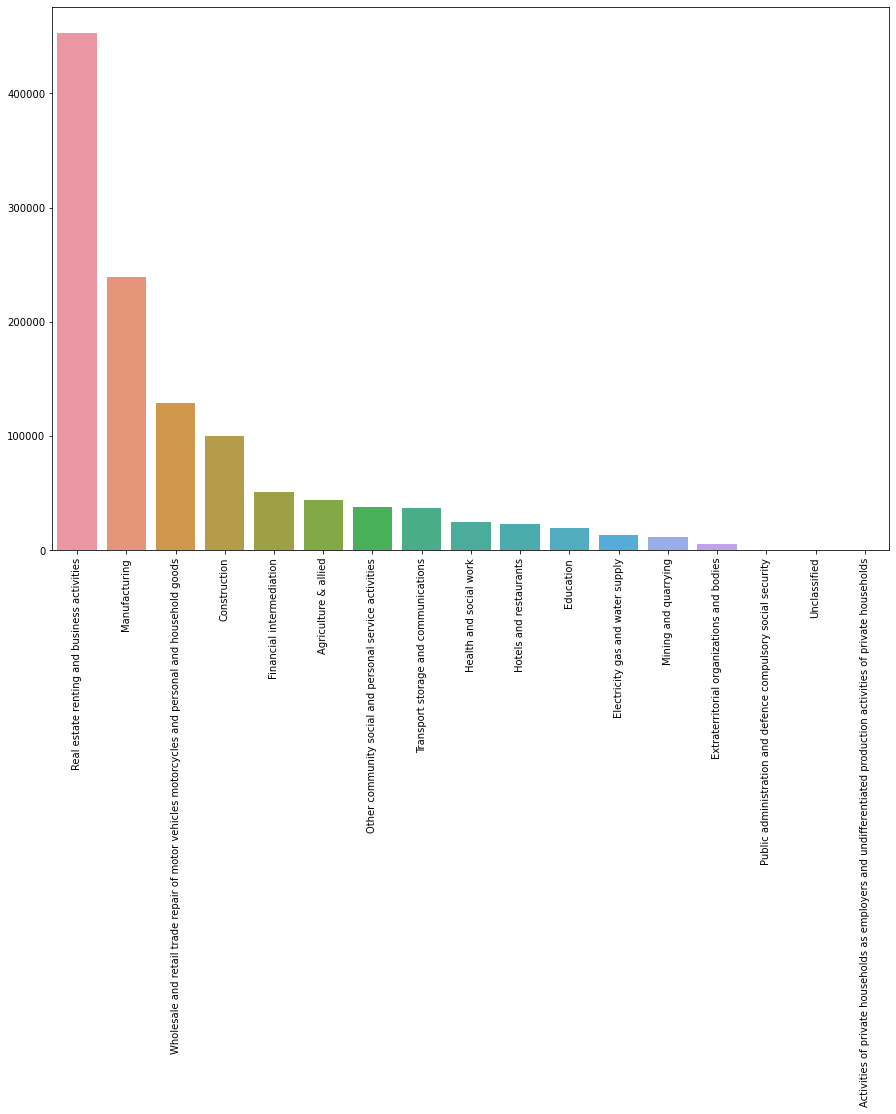

In [19]:
ab1 = df2['Principal_service'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(ab1.index,ab1.values)
plt.xticks(rotation=90)
plt.show()

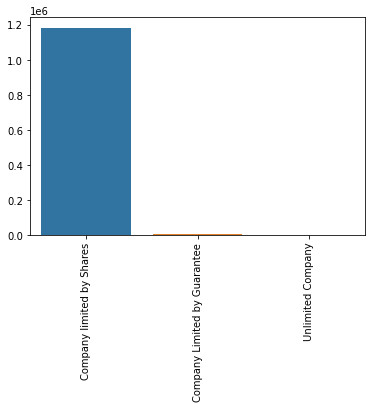

In [20]:
ab2 = df2['Category'].value_counts()
sns.barplot(ab2.index,ab2.values)
plt.xticks(rotation=90)
plt.show()

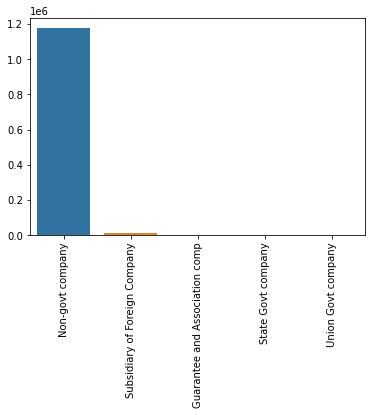

In [21]:
ab3 = df2['Sub_category'].value_counts()
sns.barplot(ab3.index,ab3.values)
plt.xticks(rotation=90)
plt.show()

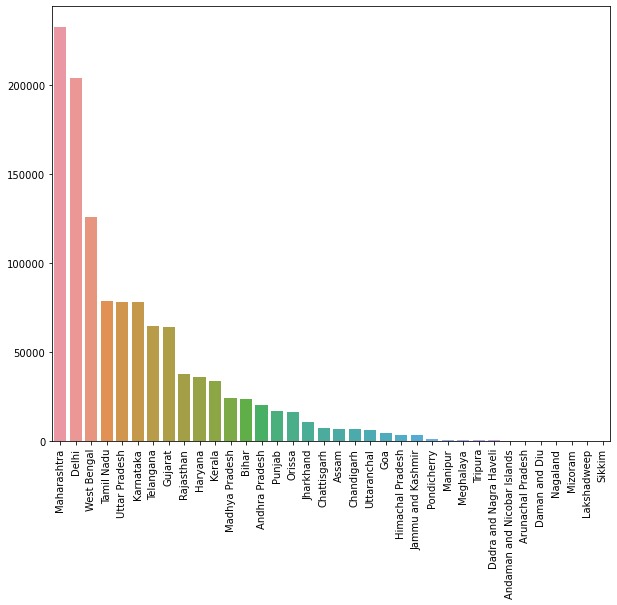

In [22]:
ab4 = df2['State'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(ab4.index,ab4.values)
plt.xticks(rotation=90)
plt.show()

         Authorized_cap  Paidup_cap
Class                              
Private       1000000.0    100000.0
Public       10000000.0   4179058.0


array([<AxesSubplot:ylabel='Authorized_cap'>,
       <AxesSubplot:ylabel='Paidup_cap'>], dtype=object)

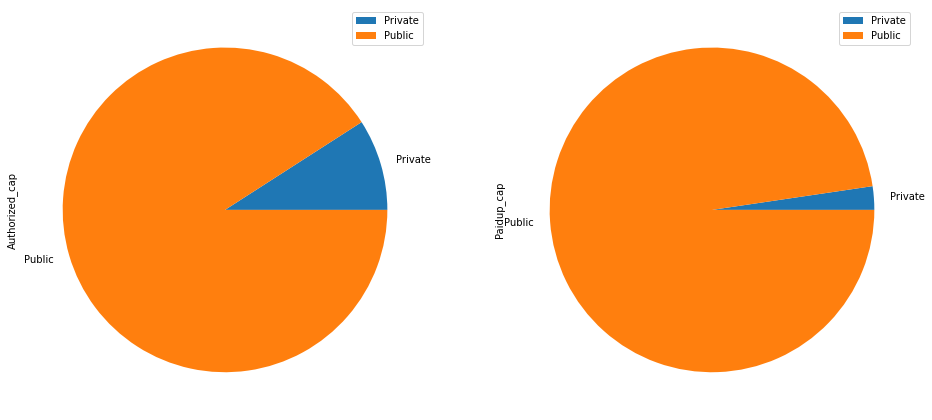

In [23]:
gp1 = df2.groupby('Class')['Authorized_cap','Paidup_cap'].median()
print(gp1)
gp1.plot(kind="pie",figsize=(16,12),subplots=True)

                              Authorized_cap  Paidup_cap
Category                                                
Company Limited by Guarantee             0.0         0.0
Company limited by Shares          1000000.0    100000.0
Unlimited Company                  1000000.0    279000.0


array([<AxesSubplot:ylabel='Authorized_cap'>,
       <AxesSubplot:ylabel='Paidup_cap'>], dtype=object)

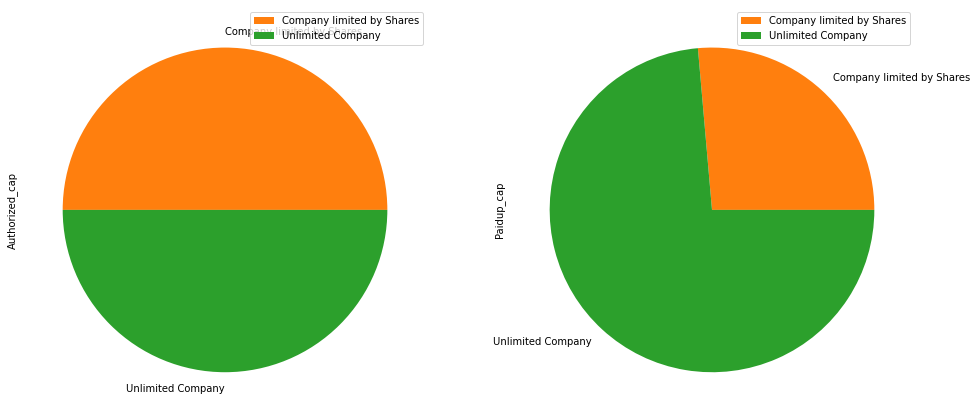

In [24]:
gp2 = df2.groupby('Category')['Authorized_cap','Paidup_cap'].median()
print(gp2)
gp2.plot(kind="pie",figsize=(16,12),subplots=True)

                                Authorized_cap   Paidup_cap
Sub_category                                               
Guarantee and Association comp             0.0          0.0
Non-govt company                     1000000.0     100000.0
State Govt company                  60000000.0   22617500.0
Subsidiary of Foreign Company        2500000.0    1000000.0
Union Govt company                 600000000.0  303250000.0


array([<AxesSubplot:ylabel='Authorized_cap'>,
       <AxesSubplot:ylabel='Paidup_cap'>], dtype=object)

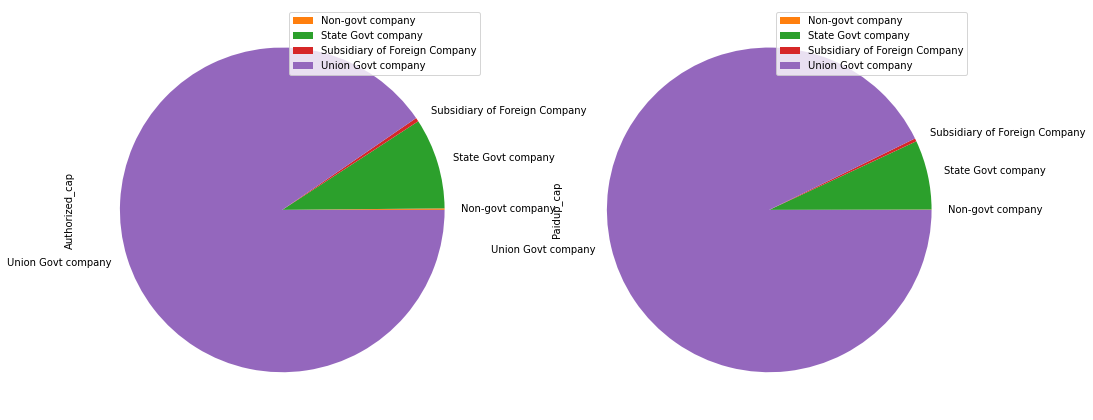

In [25]:
gp3 = df2.groupby('Sub_category')['Authorized_cap','Paidup_cap'].median()
print(gp3)
gp3.plot(kind="pie",figsize=(16,12),subplots=True)

                                                    Authorized_cap  Paidup_cap
Principal_service                                                             
Activities of private households as employers a...        200000.0    100000.0
Agriculture & allied                                     1000000.0    110000.0
Construction                                             1000000.0    133110.0
Education                                                 100000.0    100000.0
Electricity gas and water supply                         1000000.0    200000.0
Extraterritorial organizations and bodies                1000000.0    200000.0
Financial intermediation                                 2000000.0   1000000.0
Health and social work                                   1000000.0    100000.0
Hotels and restaurants                                   1000000.0    200000.0
Manufacturing                                            1000000.0    600000.0
Mining and quarrying                                

array([<AxesSubplot:title={'center':'Authorized_cap'}, xlabel='Principal_service'>,
       <AxesSubplot:title={'center':'Paidup_cap'}, xlabel='Principal_service'>],
      dtype=object)

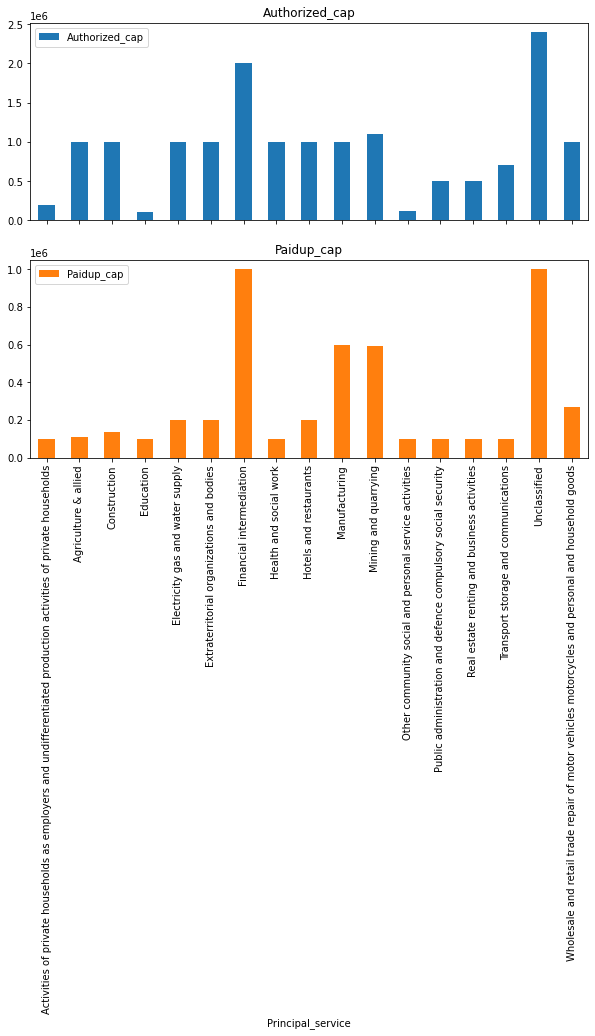

In [26]:
gp4 = df2.groupby('Principal_service')['Authorized_cap','Paidup_cap'].median()
print(gp4)
gp4.plot(kind="bar",figsize=(10,8),subplots=True)

State                        Class  
Andaman and Nicobar Islands  Private       349
                             Public          5
Andhra Pradesh               Private     19374
                             Public        854
Arunachal Pradesh            Private       235
                                         ...  
Uttar Pradesh                Public       4338
Uttaranchal                  Private      5745
                             Public        397
West Bengal                  Private    117612
                             Public       8604
Name: Class, Length: 71, dtype: int64


array([<AxesSubplot:title={'center':'Class'}, xlabel='State,Class'>],
      dtype=object)

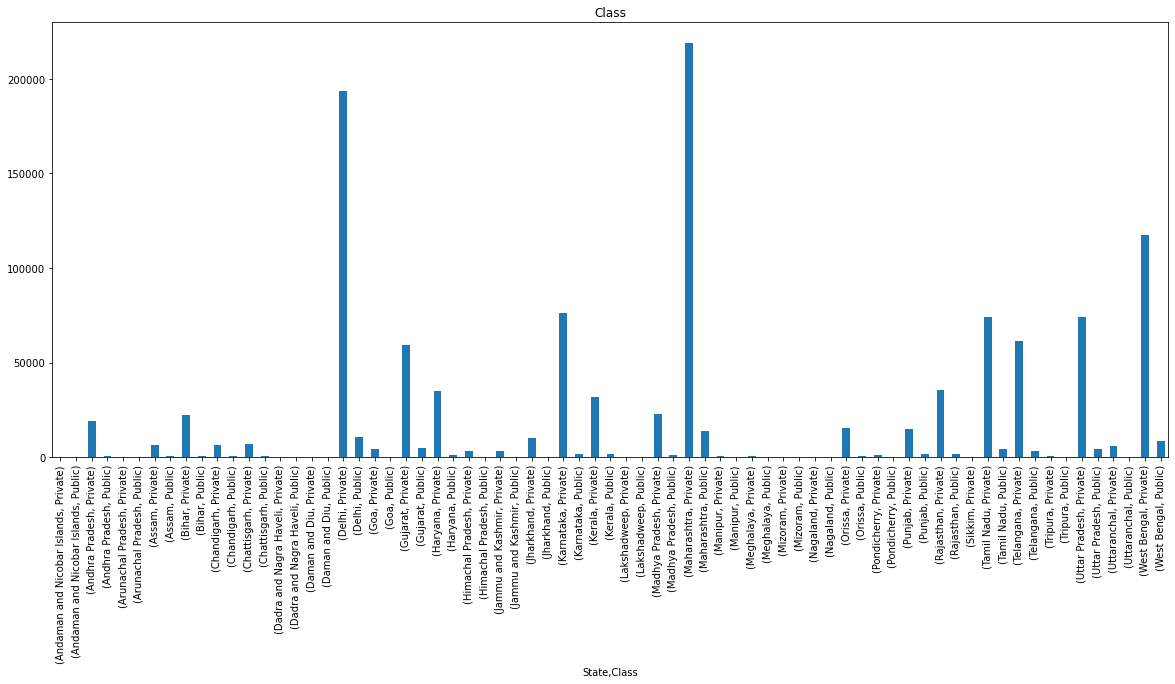

In [27]:
gp5 = df2.groupby(['State','Class'])['Class'].count()
print(gp5)
gp5.plot(kind="bar",figsize=(20,8),subplots=True)

<AxesSubplot:xlabel='State,Category'>

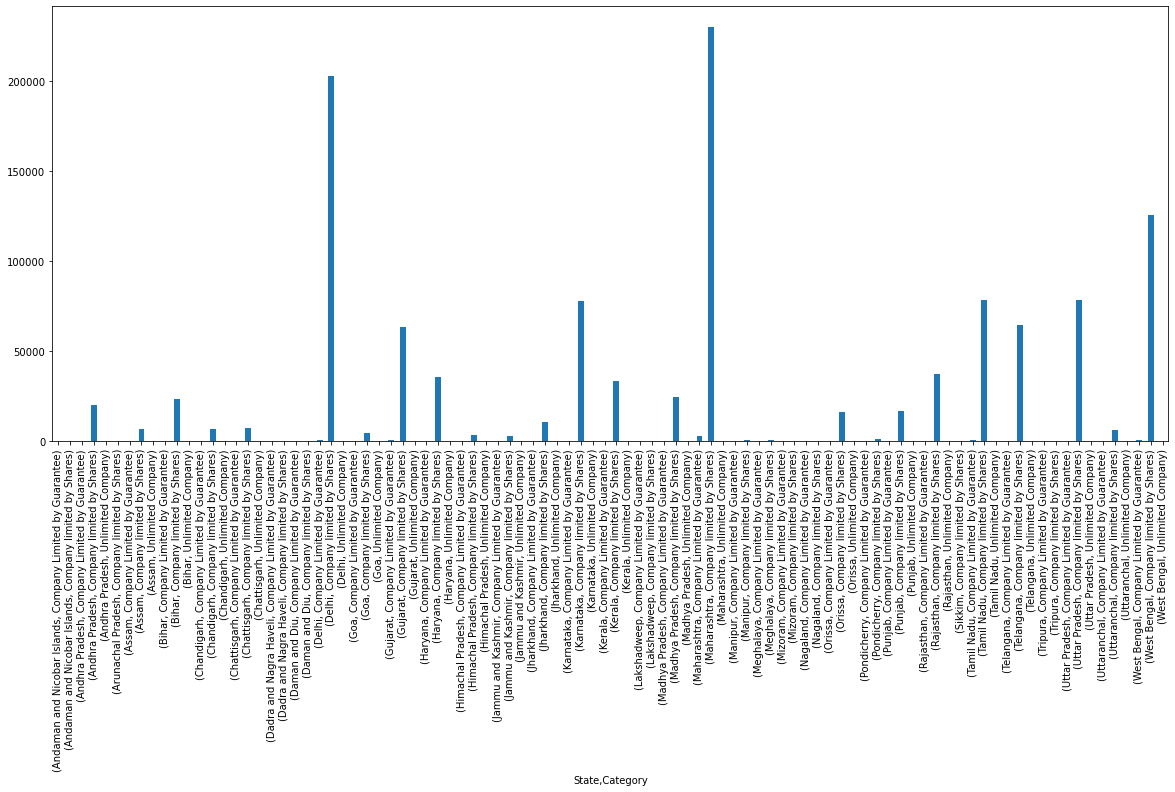

In [28]:
gp6 = df2.groupby(['State','Category'])['Category'].count()
gp6.plot(kind="bar",figsize=(20,8))

# Analysis of Public finance in India

In [29]:
df3.head()

,TAX REVENUE,DIRECT TAXES,Corporation tax,Taxes on income,Estate duty,Interest tax,Wealth tax,Gift tax,Land revenue,Agricultural tax,...,Fiscal Services,General Services,Social & Community Services,Economic Services,External grants,SELF-BALANCING ITEM,TRANSFER FROM FUNDS,ADJUSTMENT ON ACCOUNT OF DIFFERENCE IN FIGURES OF TRANSFERS,OTHER ADJUSTMENTS,TOTAL
Heads of Receipts,,,,,,,,,,,,,,,,,,,,,
1990-91,87723.28,12260.11,5335.26,5377.10,3.07,-0.86,231.17,3.38,603.47,169.44,...,563.41,2464.69,660.99,2402.70,585.61,5.45,672.05,-1405.63,0,99281.93
1995-96,175259.40,35778.25,16487.12,15591.81,0.39,1170.05,74.16,11.4,1327.34,142.27,...,1039.23,8987.61,1213.67,5848.61,1138.02,0.04,111.07,-1068.03,0,207170.18
1996-97,200055.73,41061.69,18566.62,18234.01,0.06,1712.39,77.44,10.3,1076.62,103.24,...,879.42,6643.45,1335.82,6197.39,1189.80,0.04,1168.27,-232.39,0,234059.84
1997-98,213065.06,42946.06,20016.00,17100.60,0.25,1205.18,113.03,9.08,1092.00,182.01,...,873.57,8026.54,1842.99,6779.68,1018.42,0,1449.69,6479.60,0,257993.65
1998-99,233017.88,49120.58,24529.11,20240.32,-0.07,1263.82,162.04,9.96,1033.27,241.16,...,873.00,7364.99,1927.80,7379.34,987.28,0,1718.43,-1353.80,0,274768.94


In [30]:
df3.tail()

,TAX REVENUE,DIRECT TAXES,Corporation tax,Taxes on income,Estate duty,Interest tax,Wealth tax,Gift tax,Land revenue,Agricultural tax,...,Fiscal Services,General Services,Social & Community Services,Economic Services,External grants,SELF-BALANCING ITEM,TRANSFER FROM FUNDS,ADJUSTMENT ON ACCOUNT OF DIFFERENCE IN FIGURES OF TRANSFERS,OTHER ADJUSTMENTS,TOTAL
Heads of Receipts,,,,,,,,,,,,,,,,,,,,,
2015-16 (RE),2384421.0,763454.0,452970.0,291653.0,0,0,0.0,0,11318.0,108.0,...,103.0,46085.0,35602.0,98750.0,2937.0,0,-,94906.0,0,2853166.0
2015-16,2335483.0,752231.0,453228.0,280323.0,1,5,1079.0,0,10798.0,99.0,...,630.0,47053.0,35376.0,133001.0,1881.0,0,NaN,8494.0,NaN,2732093.0
2016-17(BE),2684384.0,862077.0,493924.0,345776.0,0,0,0.0,0,14090.0,116.0,...,103.0,58342.0,47626.0,150035.0,2862.0,0,-,201850.0,0,3345572.0
2016-17 (RE),2691449.0,859481.0,493924.0,345779.0,0,0,0.0,0,12109.0,102.0,...,658.0,51835.0,47275.0,194049.0,2882.0,0,NaN,175709.0,NaN,3370493.0
2017-18 (BE),3011928.0,996185.0,538745.0,433494.0,0,0,0.0,0,15543.0,113.0,...,660.0,55678.0,38647.0,182547.0,3060.0,0,NaN,229634.0,NaN,3709020.0


In [31]:
df3=df3.dropna(axis=1)
df3 = df3.replace({'-':0})
df3 = df3.astype('float')

In [32]:
df3.isnull().sum()

TAX REVENUE                                                         0
DIRECT TAXES                                                        0
Corporation tax                                                     0
Taxes on income                                                     0
Estate duty                                                         0
Interest tax                                                        0
Wealth tax                                                          0
Gift tax                                                            0
Land revenue                                                        0
Agricultural tax                                                    0
Hotel receipts tax                                                  0
Expenditure tax                                                     0
Others                                                              0
INDIRECT TAXES                                                      0
Customs             

In [33]:
df3.columns

Index(['TAX REVENUE', 'DIRECT TAXES', 'Corporation tax', 'Taxes on income',
       'Estate duty', 'Interest tax', 'Wealth tax', 'Gift tax', 'Land revenue',
       'Agricultural tax', 'Hotel receipts tax', 'Expenditure tax', 'Others',
       'INDIRECT TAXES', 'Customs', 'Union excise duties', 'State excise duty',
       'Stamp & registration fees', 'General sales tax', 'Taxes on vehicle',
       'Entertainment tax', 'Taxes on goods & passengers',
       'Taxes & duty on electricity',
       'Taxes on purchase of sugarcane (including cess on sugarcane)',
       'Others.1', 'NON-TAX REVENUE',
       'Net contribution of public undertakings',
       'Net contribution of departmental undertakings', 'Railways', 'Posts',
       'Profits of RBI', 'Forests', 'Power projects',
       'Irrigation projects (commercial) and Multipurpose river projects',
       'Discount royalty on crude oil', 'Others.2',
       'Dividends from non-depart- mental undertakings', 'Interest receipts',
       'Fiscal Se

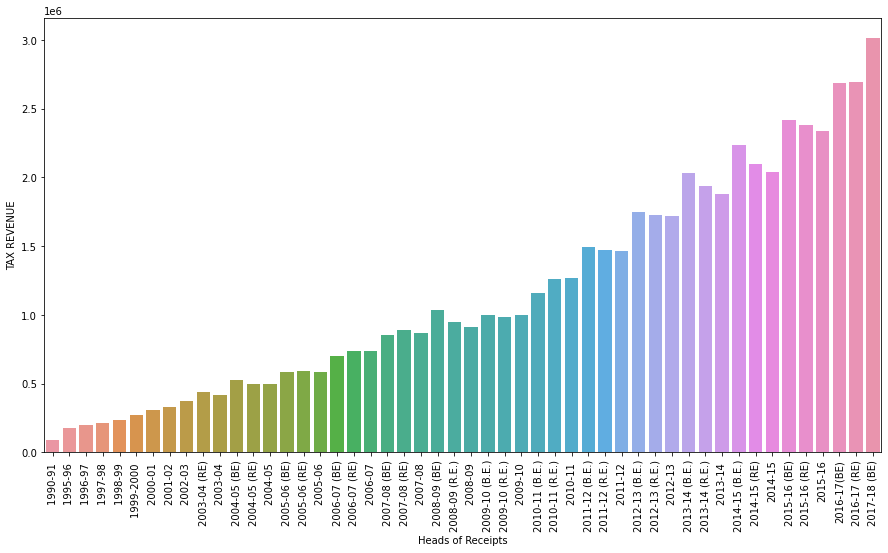

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(df3.index,df3['TAX REVENUE'])
plt.xticks(rotation=90)
plt.show()

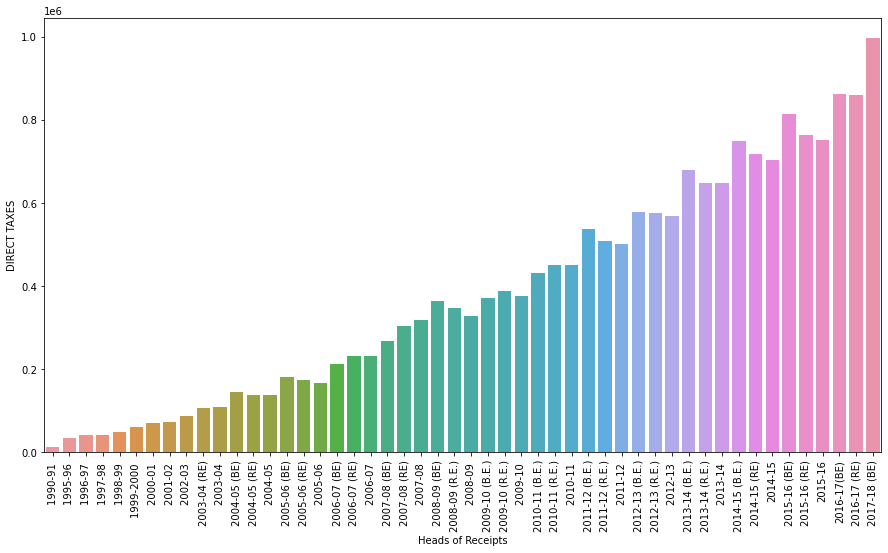

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(df3.index,df3['DIRECT TAXES'])
plt.xticks(rotation=90)
plt.show()

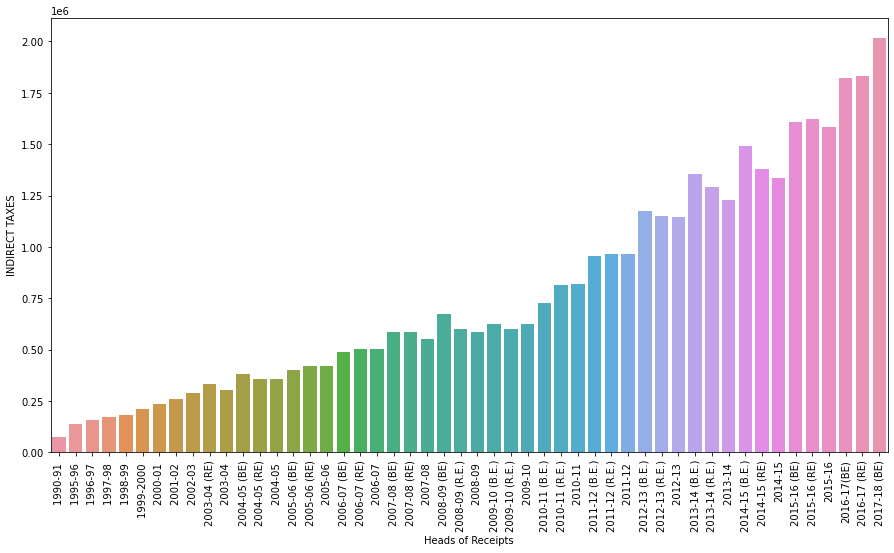

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(df3.index,df3['INDIRECT TAXES'])
plt.xticks(rotation=90)
plt.show()

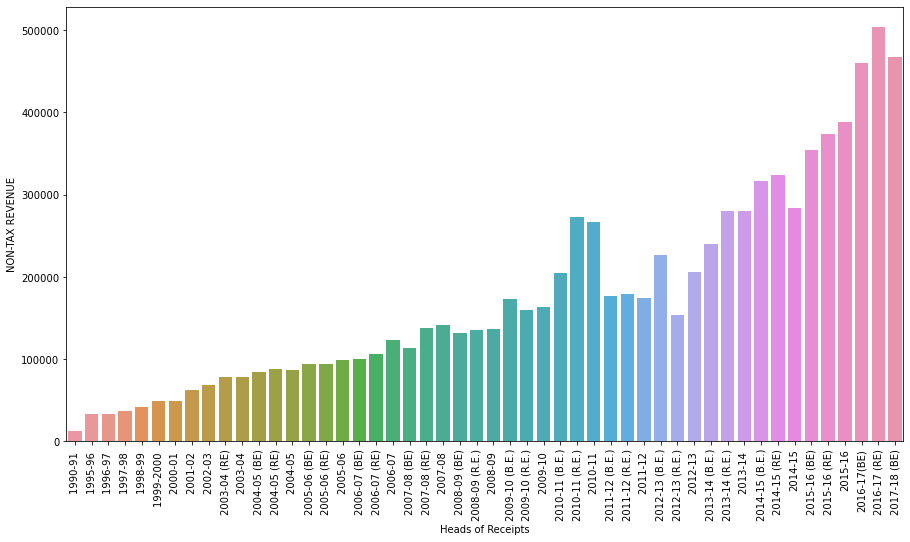

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(df3.index,df3['NON-TAX REVENUE'])
plt.xticks(rotation=90)
plt.show()

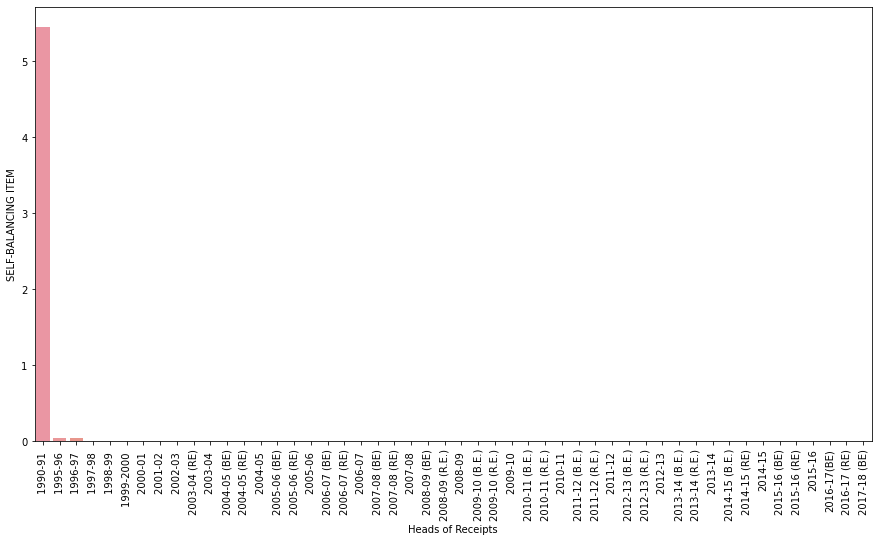

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(df3.index,df3['SELF-BALANCING ITEM'])
plt.xticks(rotation=90)
plt.show()

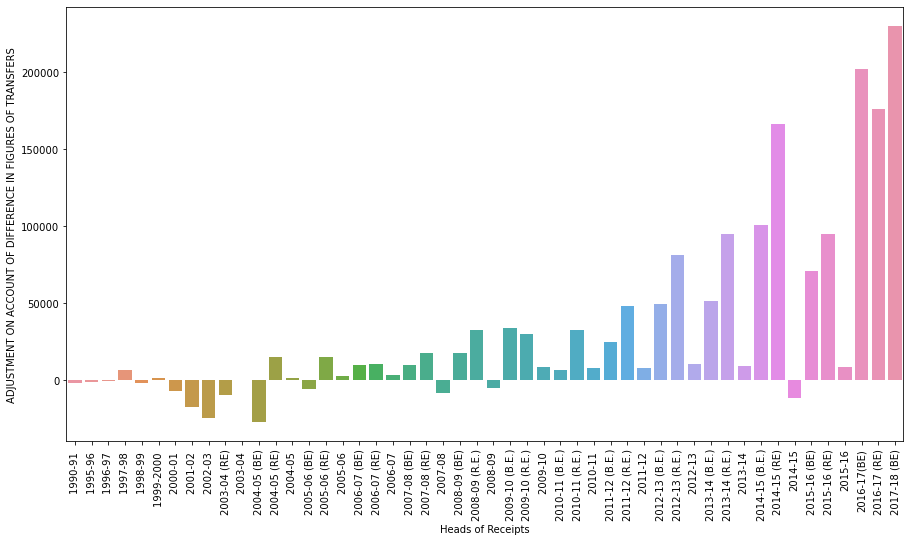

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(df3.index,df3['ADJUSTMENT ON ACCOUNT OF DIFFERENCE IN FIGURES OF TRANSFERS'])
plt.xticks(rotation=90)
plt.show()

# Direct tax service analysis

In [40]:
direct_tax = ['Corporation tax', 'Taxes on income','Estate duty', 'Interest tax', 'Wealth tax', 'Gift tax', 'Land revenue',
       'Agricultural tax', 'Hotel receipts tax', 'Expenditure tax', 'Others']

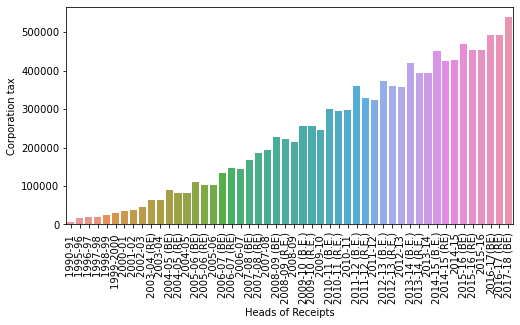

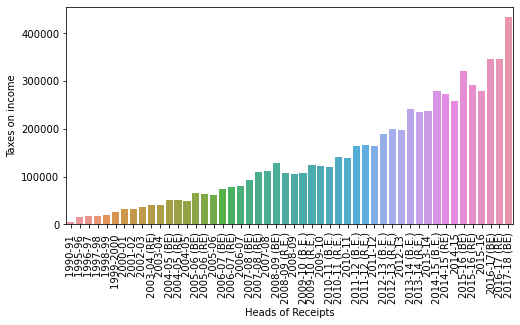

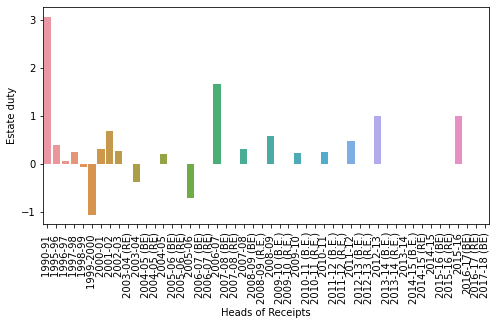

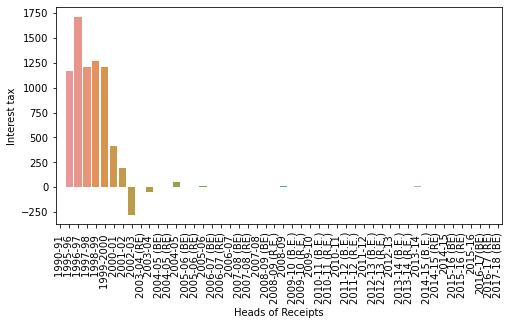

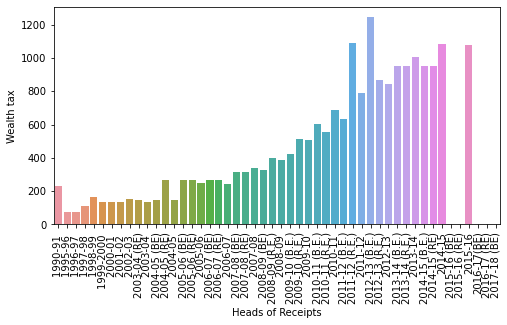

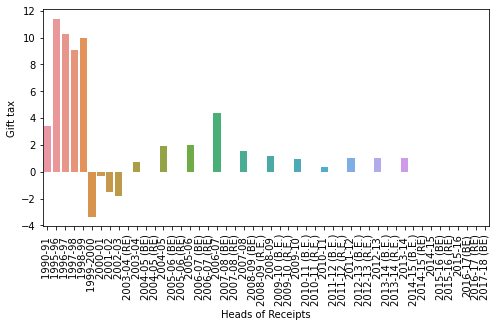

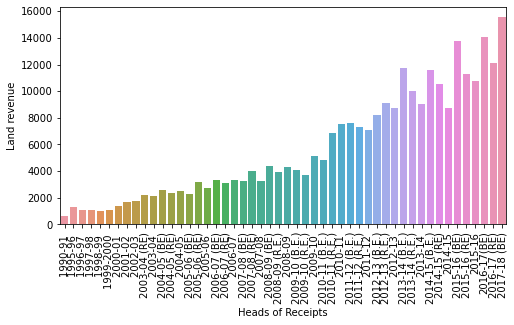

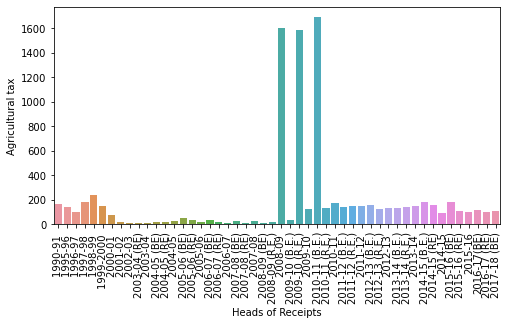

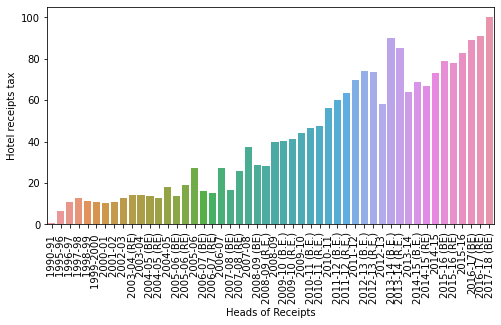

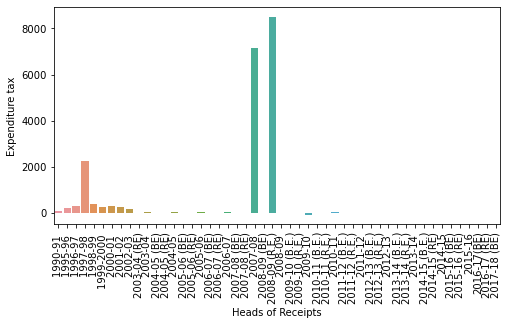

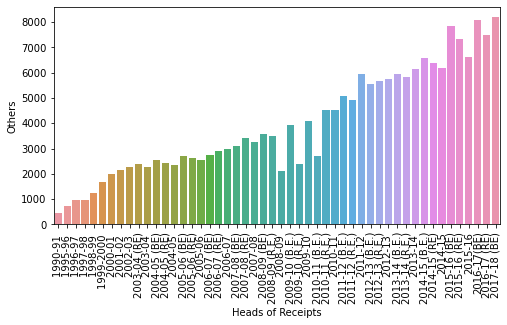

In [41]:
for i in direct_tax:
    plt.figure(figsize=(8,4))
    sns.barplot(df3.index,df3[i])
    plt.xticks(rotation=90)
    plt.show()

# Indirect tax service analysis

In [42]:
indirect_tax = ['Customs', 'Union excise duties', 'State excise duty',
       'Stamp & registration fees', 'General sales tax', 'Taxes on vehicle','Entertainment tax', 'Taxes on goods & passengers',
       'Taxes & duty on electricity','Taxes on purchase of sugarcane (including cess on sugarcane)','Others.1']

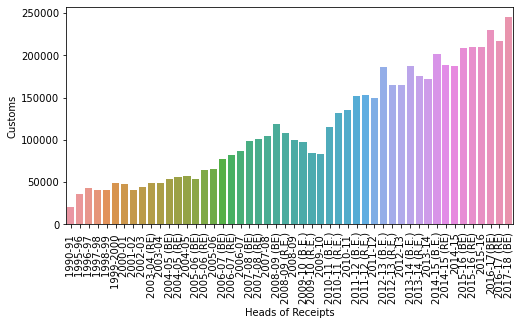

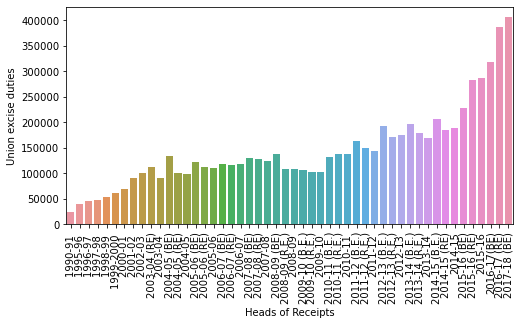

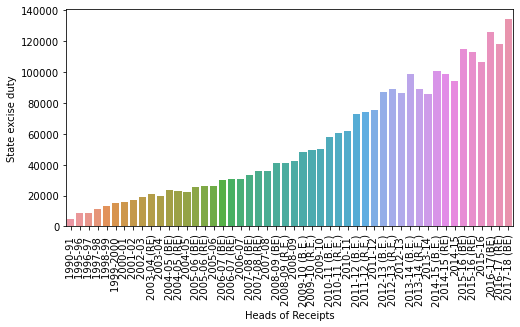

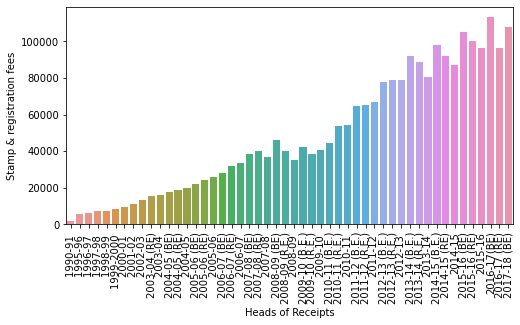

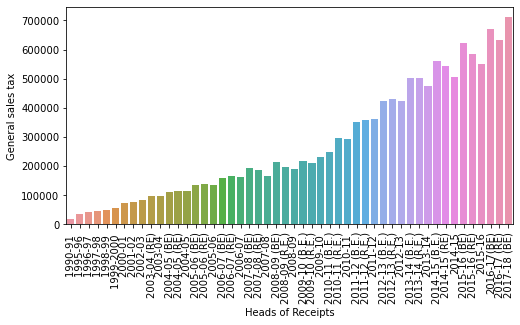

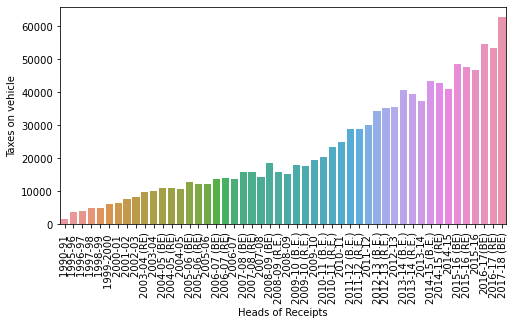

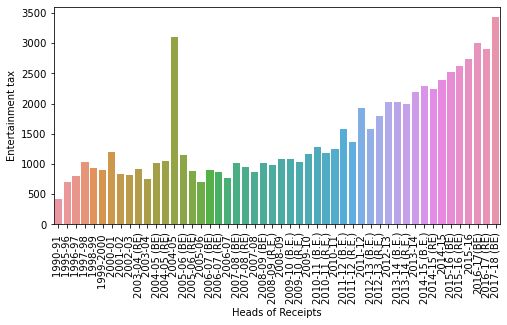

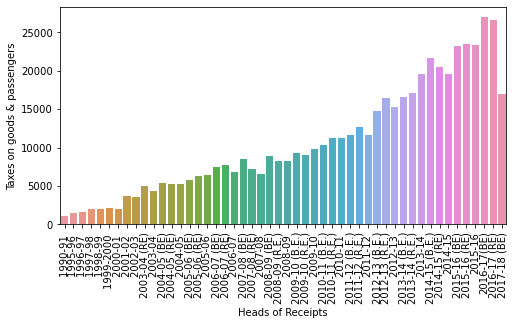

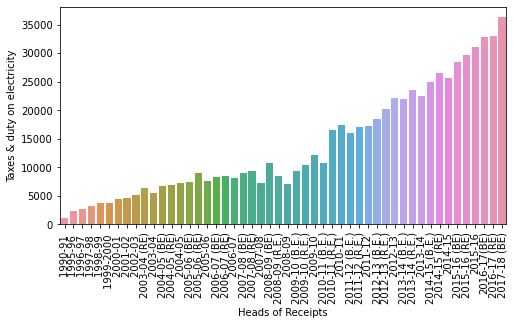

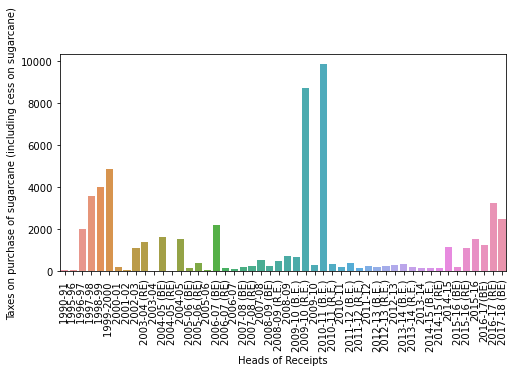

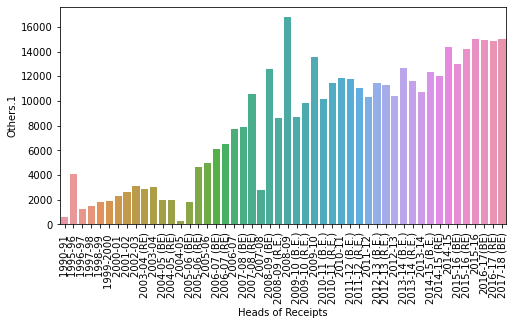

In [43]:
for i in indirect_tax:
    plt.figure(figsize=(8,4))
    sns.barplot(df3.index,df3[i])
    plt.xticks(rotation=90)
    plt.show()

# Non-tax revenue analysis

In [44]:
non_tax_rev = ['Net contribution of public undertakings','Net contribution of departmental undertakings', 'Railways', 'Posts',
       'Profits of RBI', 'Forests', 'Power projects','Irrigation projects (commercial) and Multipurpose river projects',
       'Discount royalty on crude oil', 'Others.2','Dividends from non-depart- mental undertakings', 'Interest receipts',
       'Fiscal Services', 'General Services', 'Social & Community Services','Economic Services', 'External grants']

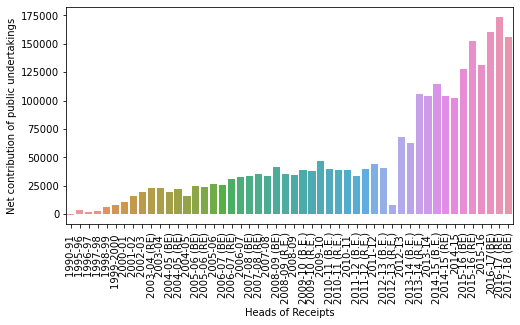

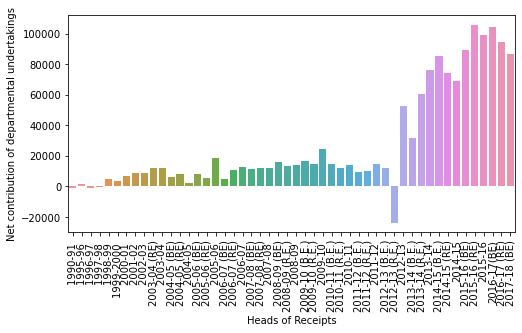

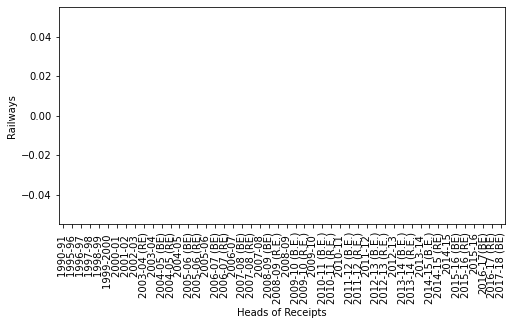

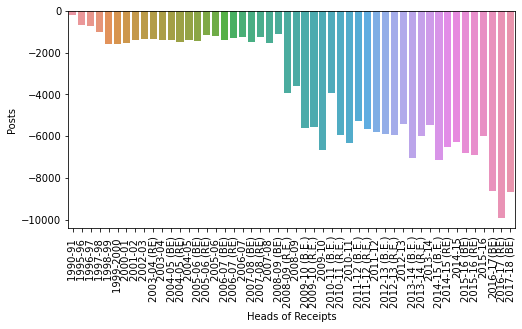

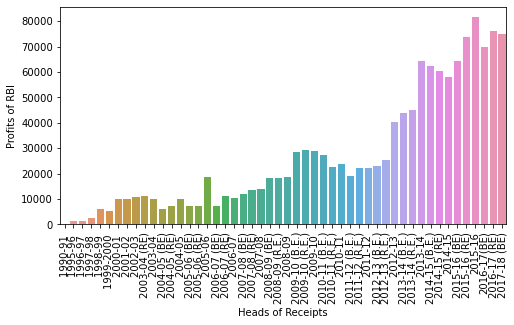

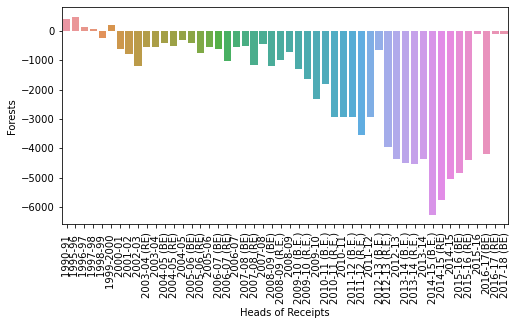

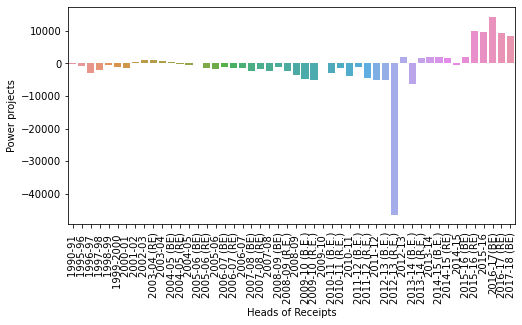

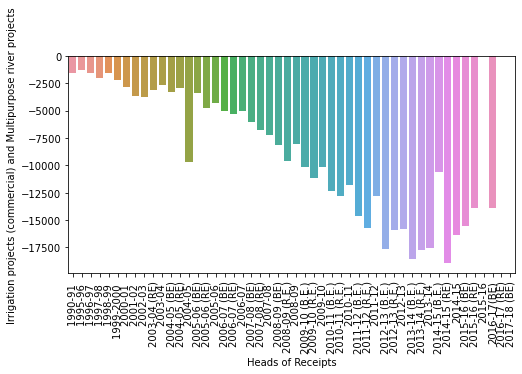

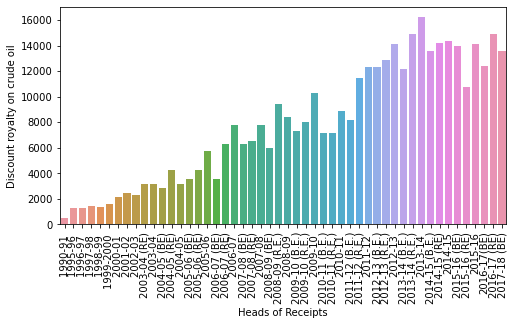

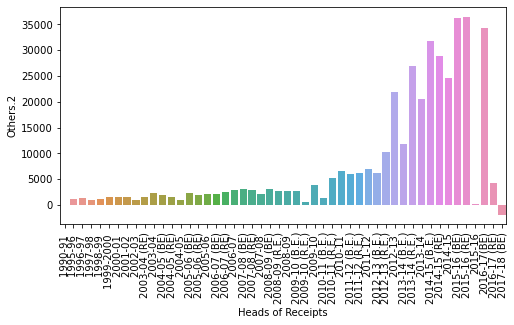

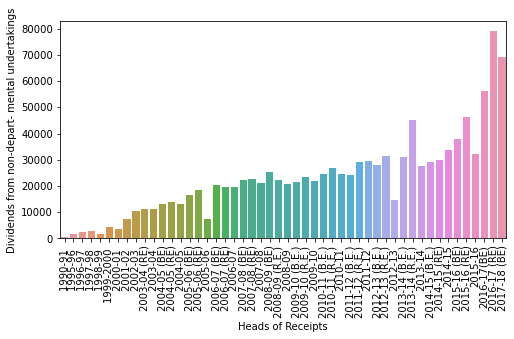

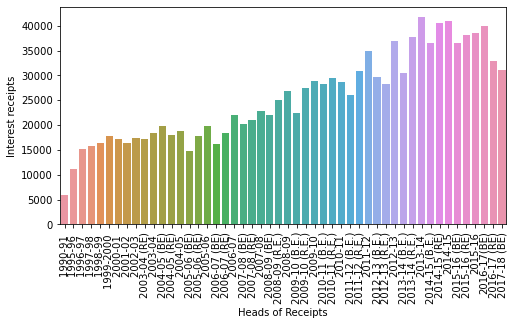

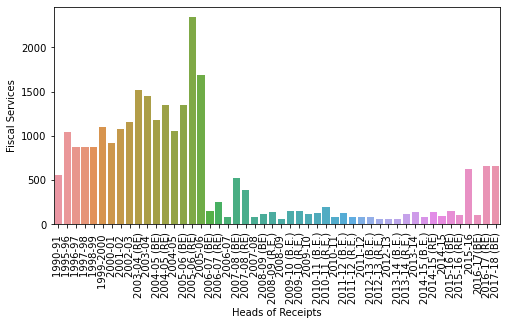

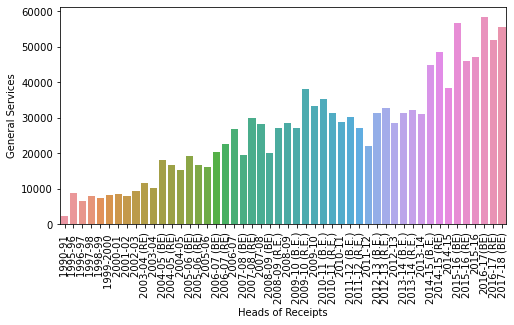

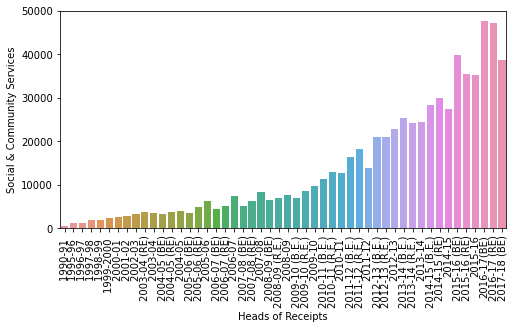

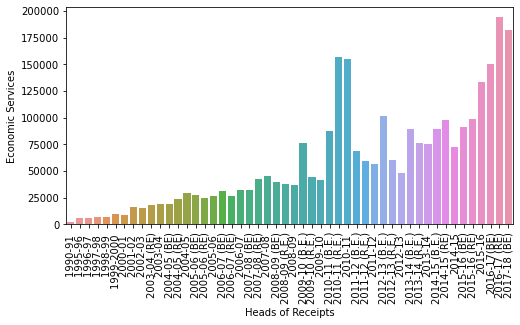

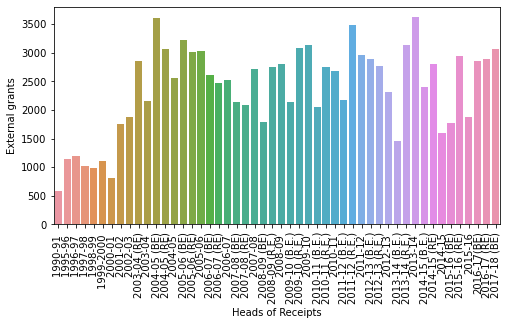

In [45]:
for i in non_tax_rev:
    plt.figure(figsize=(8,4))
    sns.barplot(df3.index,df3[i])
    plt.xticks(rotation=90)
    plt.show()

# Total tax paid by each year

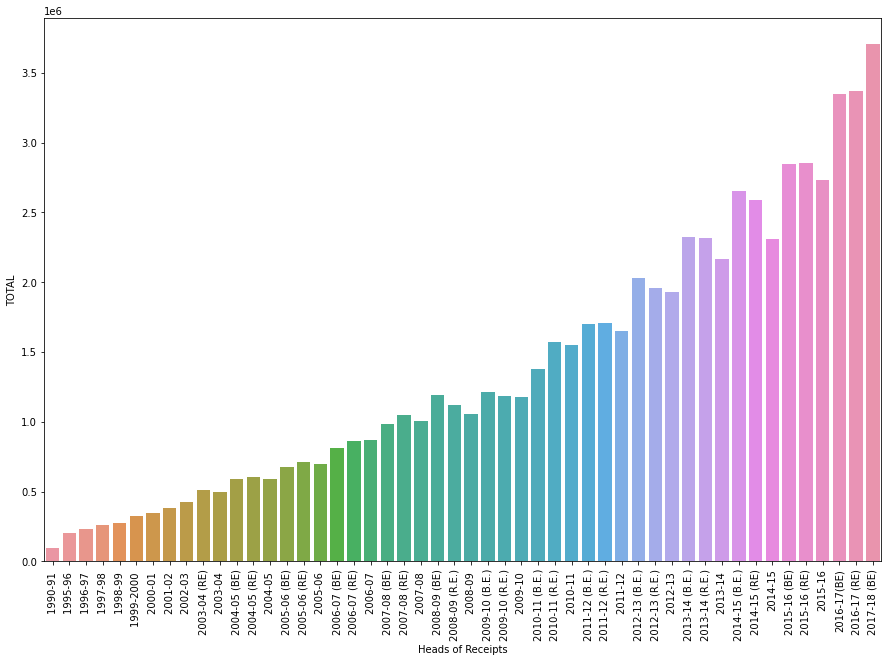

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(df3.index,df3['TOTAL'])
plt.xticks(rotation=90)
plt.show() 

# Conclusions: 

**INDIAN GST REVENUE**
* Maharastra is the highest GST revenue paying state
* Comparing to 2020, 2021 revenue is greater as inflation rises.
* Arunachal pradesh has more growth compared to other states.

**COMPANY FIRM ANALYSIS**
* There are more than 120k companies active in India.
* Most of the companies are private.
* Maharastra stands as the starup capital of India.
* More number of startups are in the north India.
* Very few public sector companies in India.
* Most of the comapanies are providing real estate service as thier principle service.
* Average authorized capital for a company is 10 lakhs.
* Average paidup capital for a company is around 15 lakhs.
* Starting a tax consultancy in Mumbai is highly appreciated.

**INDIAN PUBLIC FINANCE**
* Tax paid by individual payer is analysed using this dtaatset.
* Around 11 types of direct and indirect taxes and 16 types of no revenue taxes are studied.
* Due to inflation taxes are increased in the following year.
* Compared to direct taxes, Indirect taxes are paid more by the citizens.
* A total average of 4 crore tax revenue is paid by a citizen in the financial year 2017-2018.
* From this analysis, We can conclude that if we focus more on indirect tax, We can able to reduce the tax revenue.
                       <----------------------------Thank you ------------------------------->